# City of Chicago Red Light Camera Analysis

The purpose of this study is to evaluate trends in Chicago's red light camera program from January 2016 through December 2020, a 5-year period, and to make recommendations accordingly. This analysis was performed using the City of Chicago's red light camera data, available at: https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/spqx-js37). The analysis first considers all red light camera locations and then isolates only those traffic camera locations that have the highest number of violations over this time period.

The hypothesis for this analysis states that the number of red light camera violations will be greater during the warm weather months, as more people are driving recreationally and there would be more vehicles on the road in general. The winter would correspondingly have the lowest number of violations. 

To begin the analysis, the red light camera .csv dataset was read into a pandas dataframe and the dataset was explored.

In [1]:
import pandas as pd

red_light_data = pd.read_csv('/Users/michaelhirschberger/Downloads/Dataquest Final Project 1/Red_Light_Camera_Violations.csv')
red_light_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791265 entries, 0 to 791264
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   INTERSECTION    791265 non-null  object 
 1   CAMERA ID       790976 non-null  float64
 2   ADDRESS         791265 non-null  object 
 3   VIOLATION DATE  791265 non-null  object 
 4   VIOLATIONS      791265 non-null  int64  
 5   X COORDINATE    749923 non-null  float64
 6   Y COORDINATE    749923 non-null  float64
 7   LATITUDE        749923 non-null  float64
 8   LONGITUDE       749923 non-null  float64
 9   LOCATION        749923 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 60.4+ MB


In [2]:
red_light_data.head(10)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,IRVING PARK AND KILPATRICK,2763.0,4700 W IRVING PARK ROA,04/09/2015,4,NaN,NaN,NaN,NaN,NaN
1,VAN BUREN AND WESTERN,2054.0,2400 W VAN BUREN STREE,04/14/2015,5,NaN,NaN,NaN,NaN,NaN
2,115TH AND HALSTED,2552.0,11500 S HALSTED STREE,04/08/2015,5,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND KILPATRICK,2764.0,4700 W IRVING PARK ROA,04/19/2015,4,NaN,NaN,NaN,NaN,NaN
4,ELSTON AND IRVING PARK,1503.0,3700 W IRVING PARK ROA,04/23/2015,3,NaN,NaN,NaN,NaN,NaN
5,31ST AND CALIFORNIA,2064.0,2800 W 31ST,09/14/2014,3,NaN,NaN,NaN,NaN,NaN
6,31ST AND CALIFORNIA,2064.0,2800 W 31ST,12/16/2014,1,NaN,NaN,NaN,NaN,NaN
7,4700 WESTERN,2141.0,4700 S WESTERN AVENUE,06/05/2019,3,1.161120e+06,1.873431e+06,41.808378,-87.684571,"(41.808378407946726, -87.68457071689552)"
8,31ST AND CALIFORNIA,2064.0,2800 W 31ST,01/30/2015,4,NaN,NaN,NaN,NaN,NaN
9,WESTERN AND DEVON,1211.0,6400 N WESTERN AVENUE,06/05/2019,2,1.159114e+06,1.942452e+06,41.997818,-87.690033,"(41.997817807026, -87.69003303469276)"


It was determined that the only columns needed for our analysis are `INTERSECTION`, `VIOLATION DATE`, and `VIOLATIONS`. It appears that these columns do not have any null values.

Next, since this analysis will be performed the basis of time, `VIOLATION DATE` was converted from an object datatype to datetime, in order to perform data manipulation with respect to time more easily. 

In [3]:
red_light_data['VIOLATION DATE'] = pd.to_datetime(red_light_data['VIOLATION DATE'])

Finally, the red light camera data was cleaned so that we only considered data for a 5-year span, from January 1, 2016 through December 31, 2016. 

In [4]:
red_light_criteria = (red_light_data['VIOLATION DATE'] >= pd.Timestamp(2016, 1, 1)) & (red_light_data['VIOLATION DATE'] < pd.Timestamp(2021, 1, 1))
red_light_cleaned = red_light_data[red_light_criteria].reset_index(drop=True)

In [5]:
red_light_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476471 entries, 0 to 476470
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   INTERSECTION    476471 non-null  object        
 1   CAMERA ID       476355 non-null  float64       
 2   ADDRESS         476471 non-null  object        
 3   VIOLATION DATE  476471 non-null  datetime64[ns]
 4   VIOLATIONS      476471 non-null  int64         
 5   X COORDINATE    451626 non-null  float64       
 6   Y COORDINATE    451626 non-null  float64       
 7   LATITUDE        451626 non-null  float64       
 8   LONGITUDE       451626 non-null  float64       
 9   LOCATION        451626 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.4+ MB


In [6]:
red_light_cleaned['INTERSECTION'].value_counts()

CALIFORNIA AND DIVERSEY         5201
KOSTNER AND NORTH               4898
BELMONT AND KEDZIE              4488
STONEY ISLAND AND 79TH          3930
VAN BUREN AND WESTERN           3632
                                ... 
IRVING PARK AND KEDZIE           948
NORTHWEST HIGHWAY AND FOSTER     908
PULASKI AND PETERSON             857
WESTERN AND 71ST                 819
CENTRAL AND MILWAUKEE            735
Name: INTERSECTION, Length: 159, dtype: int64

In [7]:
red_light_cleaned['VIOLATION DATE'].value_counts()

2016-05-21    288
2017-03-18    287
2016-05-24    287
2016-06-30    287
2016-05-25    286
             ... 
2019-01-31    207
2019-01-22    206
2019-01-28    194
2019-01-30    192
2018-11-26    174
Name: VIOLATION DATE, Length: 1827, dtype: int64

In [8]:
red_light_cleaned['VIOLATIONS'].value_counts()

1      81654
2      78315
3      65944
4      51914
5      40023
       ...  
136        1
133        1
148        1
144        1
140        1
Name: VIOLATIONS, Length: 159, dtype: int64

After visually exploring the above values for each column, no unusual values were found. 

Before focusing on the highest-violation areas, the dataset as a whole was briefly analyzed for any initial trends. First, the dataset was grouped by year in order to determine the sum of red light violations for the entire city for each year from 2016-2020, with data presented in tabular form. Note that the table below shows the last day of each year. The number of violations shown next to those dates represent the sum of the violations for that year ending in that date. 

In [9]:
red_light_year = red_light_cleaned.groupby(pd.Grouper(key='VIOLATION DATE', axis=0, freq='Y')).sum()['VIOLATIONS']

In [10]:
red_light_year

VIOLATION DATE
2016-12-31    636448
2017-12-31    526238
2018-12-31    562917
2019-12-31    530003
2020-12-31    560620
Freq: A-DEC, Name: VIOLATIONS, dtype: int64

Based on this quick calculation, it can be seen that there is not much variation in the number of violations during the 5-year period, although the year 2016 shows a slightly higher number. 

Next, the total dataset was evaluated on a monthly basis to explore trends throughout the year.

In [11]:
red_light_month = red_light_cleaned.groupby(pd.Grouper(key='VIOLATION DATE', axis=0, freq='M')).sum().reset_index()

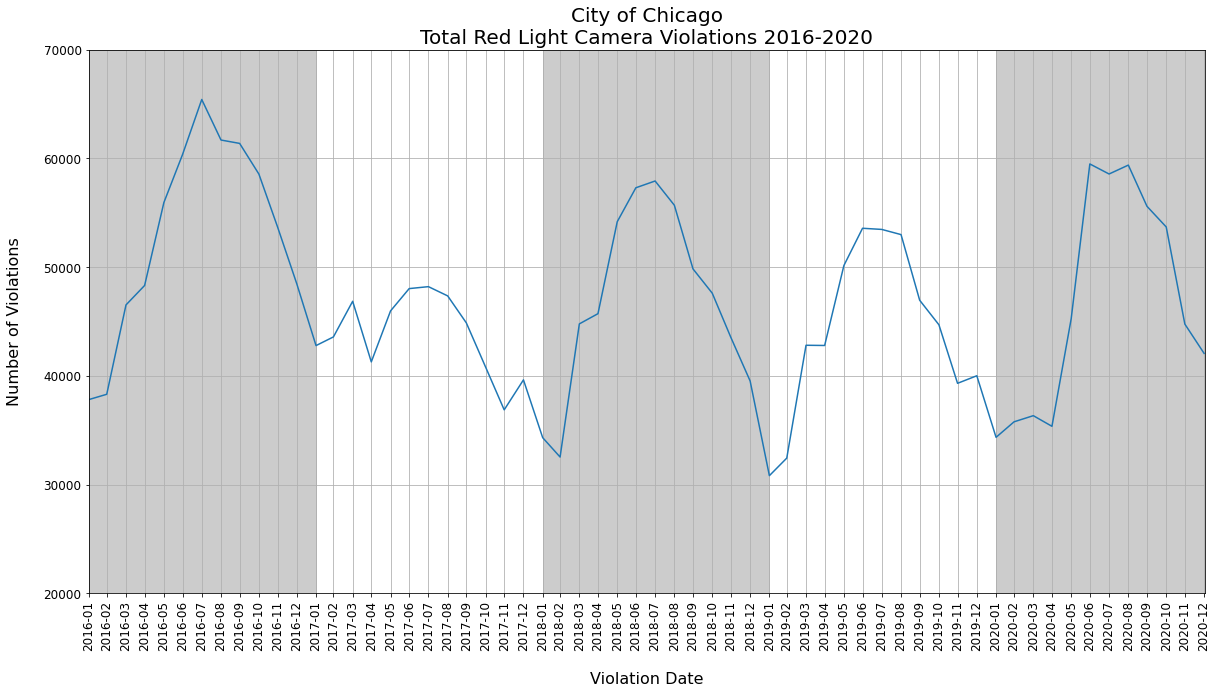

In [12]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

plt.figure(figsize=(20, 10))
plt.plot(red_light_month['VIOLATION DATE'], red_light_month['VIOLATIONS'])

x_labels = red_light_month['VIOLATION DATE'].dt.to_period('M')
plt.xticks(ticks=x_labels, labels=x_labels, rotation='vertical', size=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('City of Chicago\nTotal Red Light Camera Violations 2016-2020', size=20)
plt.ylabel('Number of Violations\n', size=16)
plt.xlabel('\nViolation Date', size=16)
plt.margins(x=0)
plt.grid(which='major', axis='both')
plt.ylim(20000, 70000)
plt.axvspan('2016-01-31', '2017-01-31', color='black', alpha=0.2)
plt.axvspan('2018-01-31', '2019-01-31', color='black', alpha=0.2)
plt.axvspan('2020-01-31', '2021-01-01', color='black', alpha=0.2)
plt.show()

Based on visual observation, these initial results generally support the hypothesis that the warm weather months (May-September) experience the highest number of red light camera violations, with monthly violations exceeding 50,000. It can be seen that the year 2017 did not experience the same high peak like those of the other 4 years, but it was still relatively higher nonetheless. 

Next, we will investigate the locations with the highest number of red light camera violations during the 2016-2020 time period.

First, we will determine the top 10 intersections for highest red light camera violations during our time period.

In [13]:
red_light_intersection = red_light_cleaned.groupby('INTERSECTION').sum().sort_values('VIOLATIONS', ascending=False).reset_index()

In [14]:
red_light_intersection.loc[:,['INTERSECTION','VIOLATIONS']].head(10)

,INTERSECTION,VIOLATIONS
0,CICERO AND I55,126078
1,LAKE SHORE DR AND BELMONT,102889
2,LAFAYETTE AND 87TH,80126
3,VAN BUREN AND WESTERN,69946
4,STATE AND 79TH,63842
5,WENTWORTH AND GARFIELD,59175
6,STONEY ISLAND AND 76TH,56449
7,LAKE AND UPPER WACKER,53822
8,99TH AND HALSTED,52812
9,CALIFORNIA AND DIVERSEY,51183


We will select the top 3 locations that have the highest number of traffic violations during the 2016-2020 time period (Cicero and I55, Lake Shore Dr and Belmont, and Lafayette and 87th) and analyze those locations individually. These locations had a distinctly higher violation count than those lower on the last, with the top 2 locations having a total of over 100,000 violations. 

In [15]:
cicero_criteria = red_light_cleaned['INTERSECTION'] == 'CICERO AND I55'
red_light_cicero_month = red_light_cleaned[cicero_criteria].groupby(pd.Grouper(key='VIOLATION DATE', axis=0, freq='M')).sum().reset_index()

In [16]:
lakeshore_criteria = red_light_cleaned['INTERSECTION'] == 'LAKE SHORE DR AND BELMONT'
red_light_lakeshore_month = red_light_cleaned[lakeshore_criteria].groupby(pd.Grouper(key='VIOLATION DATE', axis=0, freq='M')).sum().reset_index()

In [17]:
lafayette_criteria = red_light_cleaned['INTERSECTION'] == 'LAFAYETTE AND 87TH'
red_light_lafayette_month = red_light_cleaned[lafayette_criteria].groupby(pd.Grouper(key='VIOLATION DATE', axis=0, freq='M')).sum().reset_index()

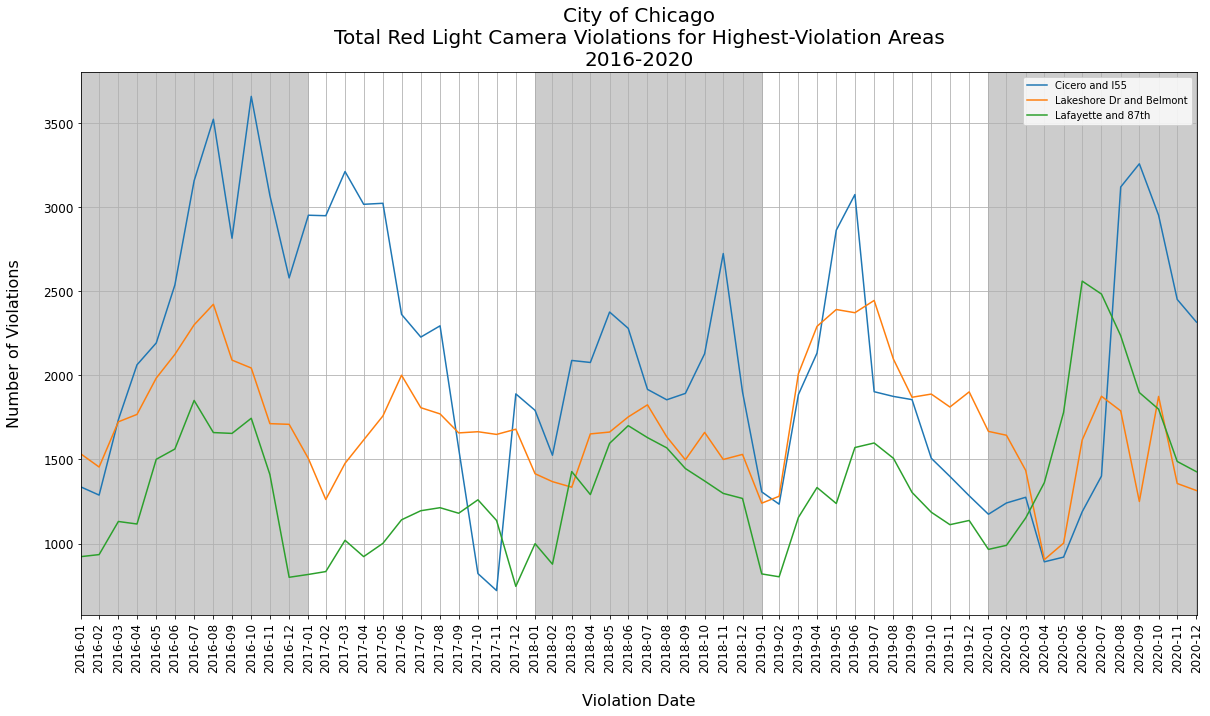

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(red_light_cicero_month['VIOLATION DATE'], red_light_cicero_month['VIOLATIONS'], label='Cicero and I55')
plt.plot(red_light_lakeshore_month['VIOLATION DATE'], red_light_lakeshore_month['VIOLATIONS'], label='Lakeshore Dr and Belmont')
plt.plot(red_light_lafayette_month['VIOLATION DATE'], red_light_lafayette_month['VIOLATIONS'], label='Lafayette and 87th')

x_labels = red_light_cicero_month['VIOLATION DATE'].dt.to_period('M')
plt.xticks(ticks=x_labels, labels=x_labels, rotation='vertical', size=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('City of Chicago\nTotal Red Light Camera Violations for Highest-Violation Areas\n2016-2020', size=20)
plt.ylabel('Number of Violations\n', size=16)
plt.xlabel('\nViolation Date', size=16)
plt.margins(x=0)
plt.grid(which='major', axis='both')
plt.legend()
plt.axvspan('2016-01-31', '2017-01-31', color='black', alpha=0.2)
plt.axvspan('2018-01-31', '2019-01-31', color='black', alpha=0.2)
plt.axvspan('2020-01-31', '2021-01-01', color='black', alpha=0.2)
plt.show()

Based on this graph, a general pattern of higher violations during the summer months can still be seen for each intersection. Next, we will calculate and analyze the monthly mean of the top 3 high-violation intersections and then compare this monthly mean to the city total red light camera violations determined earlier.

In [19]:
cicero_lakeshore_lafayette_df = pd.concat([red_light_cicero_month['VIOLATIONS'], red_light_lakeshore_month['VIOLATIONS'], red_light_lafayette_month['VIOLATIONS']], axis=1)
cicero_lakeshore_lafayette_mean = cicero_lakeshore_lafayette_df.mean(axis=1)

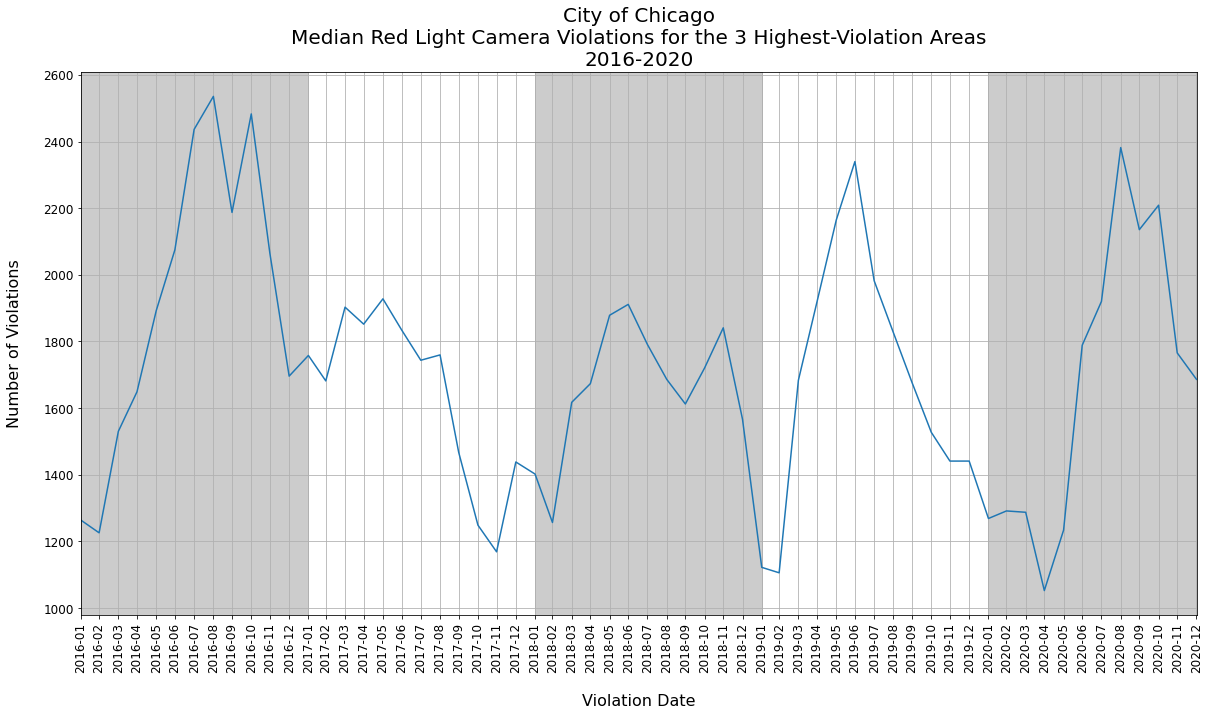

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(red_light_cicero_month['VIOLATION DATE'], cicero_lakeshore_lafayette_mean)

x_labels = red_light_cicero_month['VIOLATION DATE'].dt.to_period('M')
plt.xticks(ticks=x_labels, labels=x_labels, rotation='vertical', size=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('City of Chicago\nMedian Red Light Camera Violations for the 3 Highest-Violation Areas\n2016-2020', size=20)
plt.ylabel('Number of Violations\n', size=16)
plt.xlabel('\nViolation Date', size=16)
plt.margins(x=0)
plt.grid(which='major', axis='both')
plt.axvspan('2016-01-31', '2017-01-31', color='black', alpha=0.2)
plt.axvspan('2018-01-31', '2019-01-31', color='black', alpha=0.2)
plt.axvspan('2020-01-31', '2021-01-01', color='black', alpha=0.2)
plt.show()

In [21]:
red_light_month['VIOLATIONS'].corr(cicero_lakeshore_lafayette_mean)

0.8487182575424407

The monthly mean of violations for the top 3 intersections has a 0.85 correlation coefficient when correlated to the monthly totals for the entire city, a strong positive correlation. Finally, we will determine the mean number of violations for the top 3 intersections for each individual month. For example, the mean value for January will be the mean of the previously-determined January means for each of the 5 years in the time period. 

In [22]:
cicero_lakeshore_lafayette_mean_df = pd.concat([red_light_cicero_month['VIOLATION DATE'], cicero_lakeshore_lafayette_mean], axis=1, keys=['VIOLATION MONTH', 'VIOLATIONS'])
top3_monthly_mean = cicero_lakeshore_lafayette_mean_df.groupby(cicero_lakeshore_lafayette_mean_df['VIOLATION MONTH'].dt.month).mean().reset_index()

In [23]:
top3_monthly_mean

,VIOLATION MONTH,VIOLATIONS
0,1,1362.800000
1,2,1312.200000
2,3,1604.333333
3,4,1629.200000
4,5,1819.533333
5,6,1990.000000
6,7,1974.733333
7,8,2038.000000
8,9,1815.866667
9,10,1837.733333


The above table confirms a clear uptick in number of traffic violations that occurs during the summer months, indicating that the original hypothesis was correct. The month with the lowest number of violations was February, which had a mean of 1312.2 violations. The month with the highest number of violations was August, which had 2038 violations. This represents an increase of 725.8 violations, and a percent increase of 55.3%. The violation increase could be due to the increase in recreational driving and tourism, which would result in more vehicles being on the road overall. Based on these findings, one recommendation could be increasing police presence or crossing guards during the summer months, especially in high-violation areas and in areas where there are a large number of pedestrians. In addition, further studies could analyze traffic volumes and pedestrian volumes at different times of day to determine which times of day would be most dangerous in terms of traffic safety